## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [20]:
api_key = "CTL0P41R6O8AG6VD"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [21]:
ticker = "AAPL"

Import the appropriate libraries in the lines below each comment:

In [22]:
# pandas

import pandas as pd

# requests

import requests

# alpha_vantage TimeSeries class

from alpha_vantage.timeseries import TimeSeries

# matplotlib.pyplot as plt

import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [32]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=1min&apikey=CTL0P41R6O8AG6VD


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [33]:
AAPL = requests.get(link) 

Print the HTTP response:

In [34]:
print(AAPL)

<Response [200]>


Print the data:

In [35]:
print(AAPL.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2019-09-30 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-30 16:00:00": {
            "1. open": "223.8400",
            "2. high": "224.1400",
            "3. low": "223.8400",
            "4. close": "223.9800",
            "5. volume": "523074"
        },
        "2019-09-30 15:59:00": {
            "1. open": "223.8400",
            "2. high": "223.9200",
            "3. low": "223.7700",
            "4. close": "223.8356",
            "5. volume": "135296"
        },
        "2019-09-30 15:58:00": {
            "1. open": "223.8700",
            "2. high": "223.9300",
            "3. low": "223.7500",
            "4. close": "223.8500",
            "5. volume": "141573"
        },
        "2019-09-3

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [36]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [37]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [38]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-30 14:21:00  224.0400  224.0750  224.0200  224.0669    17453.0
2019-09-30 14:22:00  224.0648  224.1000  224.0500  224.0700    22847.0
2019-09-30 14:23:00  224.0837  224.2838  223.7076  223.8081   189877.0
2019-09-30 14:24:00  223.8100  223.8850  223.7600  223.8850    30233.0
2019-09-30 14:25:00  223.8800  224.0200  223.8800  224.0160    34534.0
2019-09-30 14:26:00  224.0100  224.0800  223.9800  224.0700    61668.0
2019-09-30 14:27:00  224.0700  224.1714  224.0600  224.1288    44031.0
2019-09-30 14:28:00  224.1200  224.1600  224.0201  224.0201    34013.0
2019-09-30 14:29:00  224.0400  224.0458  223.9300  223.9800    38036.0
2019-09-30 14:30:00  223.9700  224.0400  223.9700  224.0101    22399.0
2019-09-30 14:31:00  224.0300  224.0600  223.9400  224.0000    29204.0
2019-09-30 14:32:00  224.0000  224.0300  223.9399  223.9399    28774.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

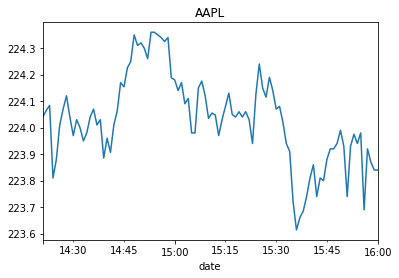

In [39]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [40]:
data.to_excel('apple_stock_data.xlsx')